In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

print(os.getcwd())

/content


In [ ]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
for i in df.columns:
  print(df[i].value_counts())

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64
0    92515
1     7485
Name: hypertension, dtype: int64
0    96058
1     3942
Name: heart_disease, dtype: int64
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: bmi, Length: 4247, dtype: int64
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: HbA1c_level, dtype: int64
130    779

In [ ]:
print(df.head().to_string())

   gender   age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  blood_glucose_level  diabetes
0  Female  80.0             0              1           never  25.19          6.6                  140         0
1  Female  54.0             0              0         No Info  27.32          6.6                   80         0
2    Male  28.0             0              0           never  27.32          5.7                  158         0
3  Female  36.0             0              0         current  23.45          5.0                  155         0
4    Male  76.0             1              1         current  20.14          4.8                  155         0


In [ ]:
print(df.sample().to_string())

       gender   age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  blood_glucose_level  diabetes
37971  Female  43.0             1              0         No Info  31.26          6.1                  140         0


In [ ]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [ ]:
print(df.describe().to_string())

                 age  hypertension  heart_disease            bmi    HbA1c_level  blood_glucose_level       diabetes
count  100000.000000  100000.00000  100000.000000  100000.000000  100000.000000        100000.000000  100000.000000
mean       41.885856       0.07485       0.039420      27.320767       5.527507           138.058060       0.085000
std        22.516840       0.26315       0.194593       6.636783       1.070672            40.708136       0.278883
min         0.080000       0.00000       0.000000      10.010000       3.500000            80.000000       0.000000
25%        24.000000       0.00000       0.000000      23.630000       4.800000           100.000000       0.000000
50%        43.000000       0.00000       0.000000      27.320000       5.800000           140.000000       0.000000
75%        60.000000       0.00000       0.000000      29.580000       6.200000           159.000000       0.000000
max        80.000000       1.00000       1.000000      95.690000       9

In [ ]:
def EDA(DF):
    print('Cleaning: Handling missing values and outliers')
    df = DF.copy()
    missing_cols = df.columns[df.isnull().any()]
    missing_value = df.columns[df.isnull().mean() > 0.5]

    null_percentage = df.isnull().mean()
    columns_to_drop = null_percentage[null_percentage > 0.5].index
    df.drop(columns=columns_to_drop, inplace=True)
    for col in missing_cols:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            if col in missing_value:
                df[col].fillna(df[col].mean(), inplace=True)

    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        lower_threshold = df[col].mean() - 3 * df[col].std()
        upper_threshold = df[col].mean() + 3 * df[col].std()

        df[col] = np.where(df[col] < lower_threshold, lower_threshold, df[col])
        df[col] = np.where(df[col] > upper_threshold, upper_threshold, df[col])

In [ ]:
EDA(DF=df)

Cleaning: Handling missing values and outliers


In [ ]:
print('Cleaned data:')
df.head()

Cleaned data:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
df.shape

(100000, 9)

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.info() # To define the data type for each columns and null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

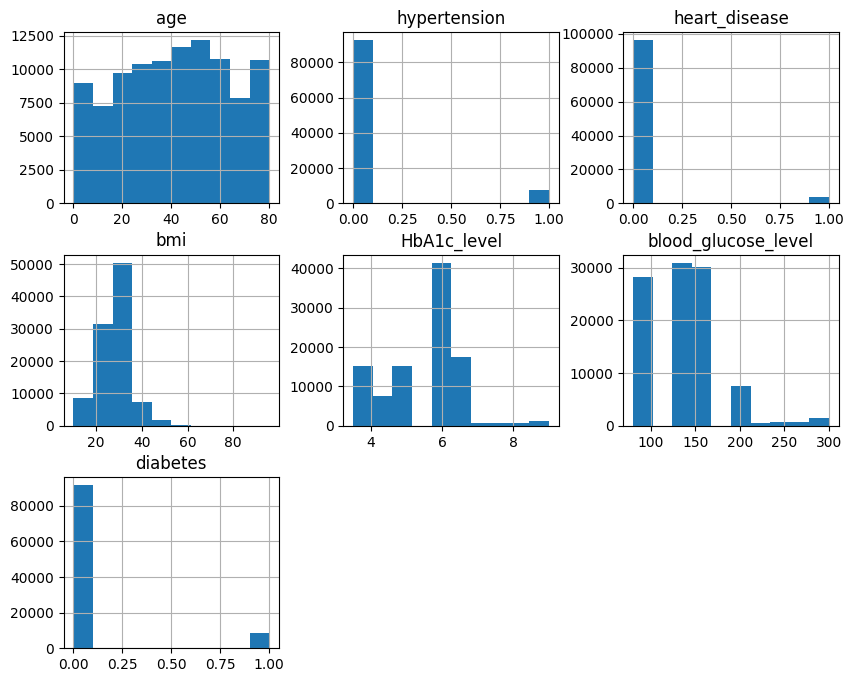

In [ ]:
df.hist(figsize=(10,8)) # Visualizations distribution columns have a data type "Number "
plt.show()

In [ ]:
df.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

#Data cleaning

In [ ]:
df.isnull().sum() # how count of null value in each columns

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.duplicated().sum()/len(df) # percentage of duplicated row by data

0.03854

##Droping duplicates

In [ ]:
df=df.drop_duplicates()

In [ ]:
print('Dupllicated',df.duplicated().sum()/len(df))
print('Shape of data after duplicated',df.shape)

Dupllicated 0.0
Shape of data after duplicated (96146, 9)


In [ ]:
# Drop rows where 'gender' is 'Other'
df = df[df['gender'] != 'Other']

# Drop any remaining rows with missing values
df = df.dropna()

In [ ]:
df = df[df['bmi'] <= 70]  # Filter of this columns value less than and equl " 70 "

In [ ]:
df=df[df['age']>=10] # Filter of this columns value more than and equl " 10 "

In [ ]:
print('Shape of data after Cleaning ',df.shape)
print('Count of rows are cleaned ', 100000- 86606)

Shape of data after Cleaning  (86606, 9)
Count of rows are cleaned  13394


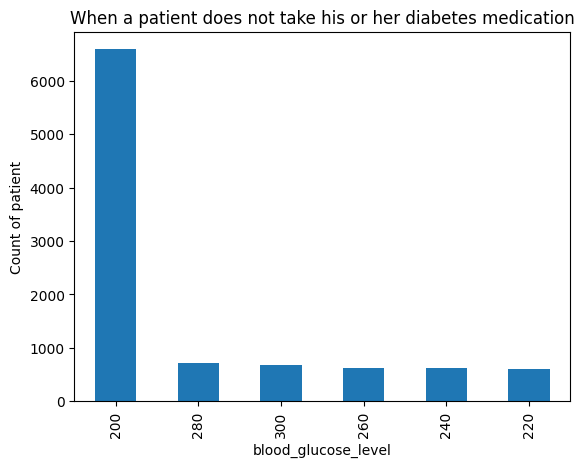

In [ ]:
blood_glucose_level_above_200=df[df['blood_glucose_level']>=200]
blood_glucose_level_above_200['blood_glucose_level'].value_counts().plot(kind='bar')
plt.title('When a patient does not take his or her diabetes medication')
plt.xlabel('blood_glucose_level')
plt.ylabel('Count of patient')
plt.show()

#Data visualization

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_and_cluster(df):
    # Plotting pairplot for numerical columns
    sns.pairplot(df.select_dtypes(include=[np.number]))
    plt.show()

    # Calculating correlation matrix
    correlation_matrix = df.corr()

    # Creating a mask for the upper triangle of the correlation matrix
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Plotting a heatmap of correlations
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=mask)
    plt.title("Correlation Heatmap")
    plt.show()

    # Identifying highly correlated pairs
    highly_correlated_pairs = np.where((correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1))
    high_corr_indices = list(zip(highly_correlated_pairs[0], highly_correlated_pairs[1]))

    # Creating visualizations for highly correlated pairs
    for i, j in high_corr_indices:
        col1, col2 = df.columns[i], df.columns[j]
        plt.figure(figsize=(10, 5))
        sns.scatterplot(data=df, x=col1, y=col2)
        plt.title(f'Scatter Plot of {col1} vs {col2}')
        plt.show()

def vis(DF):
    df = DF.copy()

    for col in df.columns:
        if df[col].dtype == 'object':
            val_counts = df[col].value_counts()
            ax = val_counts.plot(kind='bar', title=f'Bar Plot for {col}')
            add_data_labels(ax)
            plt.show()
        else:
            ax = df[col].hist(figsize=(10, 8), bins=20, edgecolor='black')
            ax.set_title(f'Histogram for {col}')
            add_data_labels(ax)
            plt.show()

def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

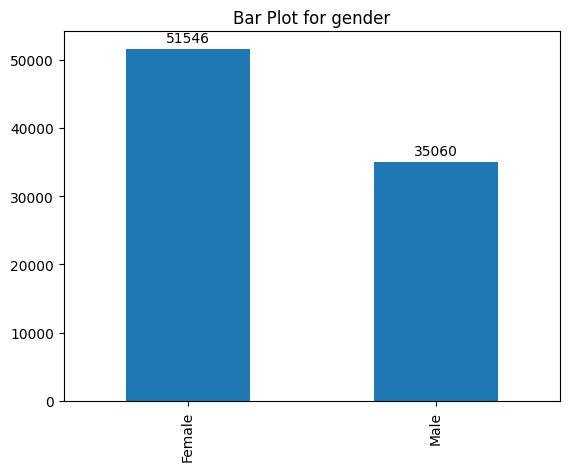

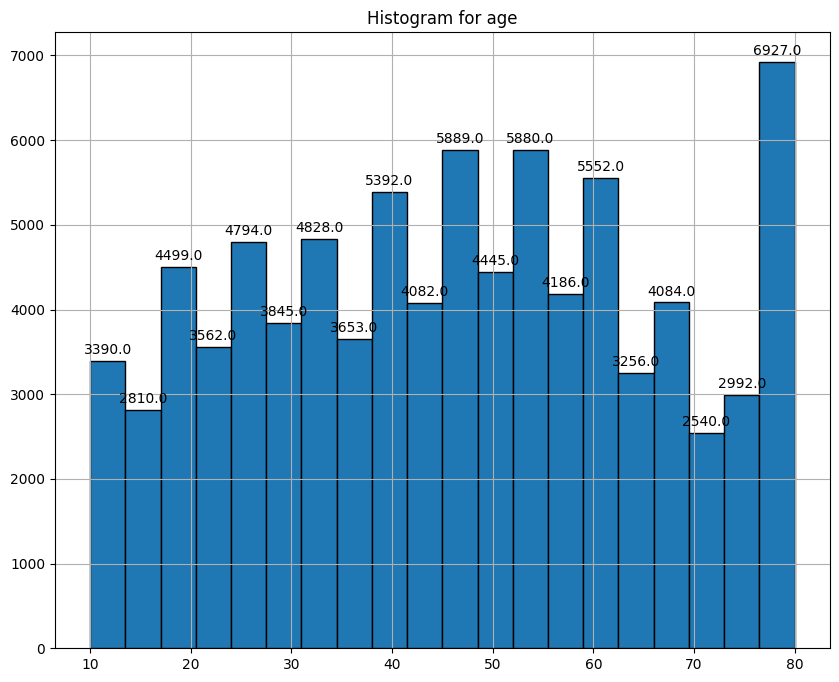

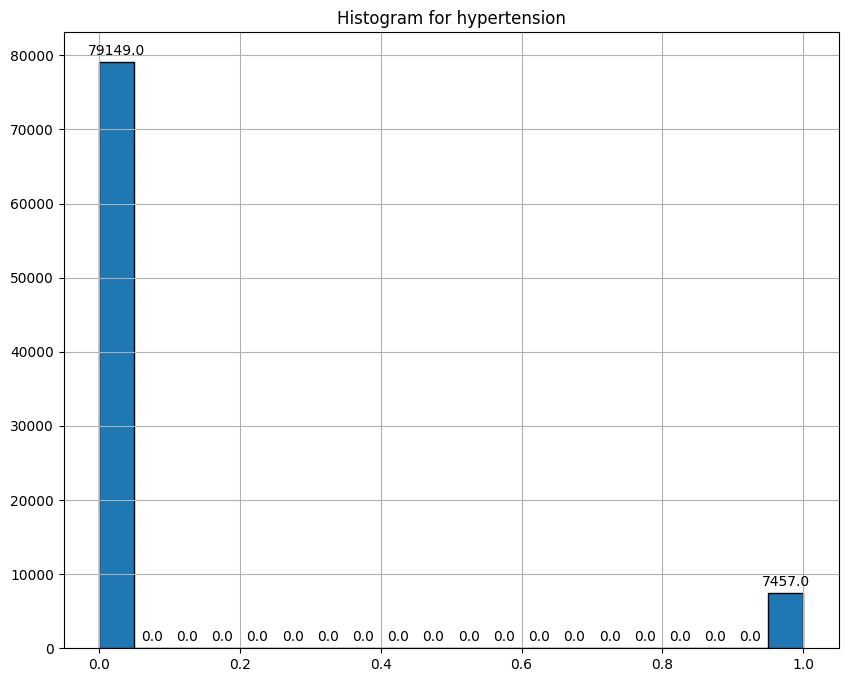

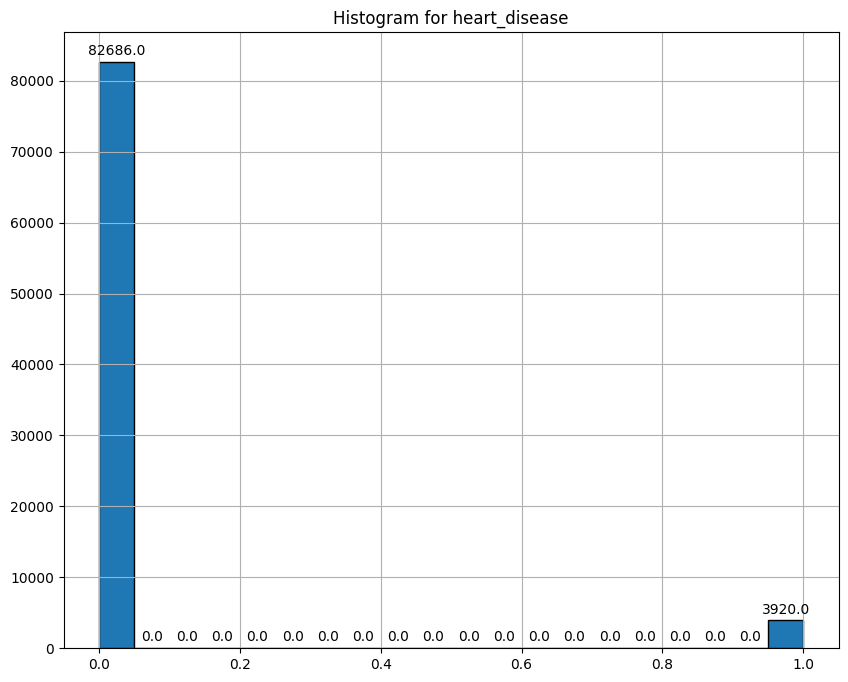

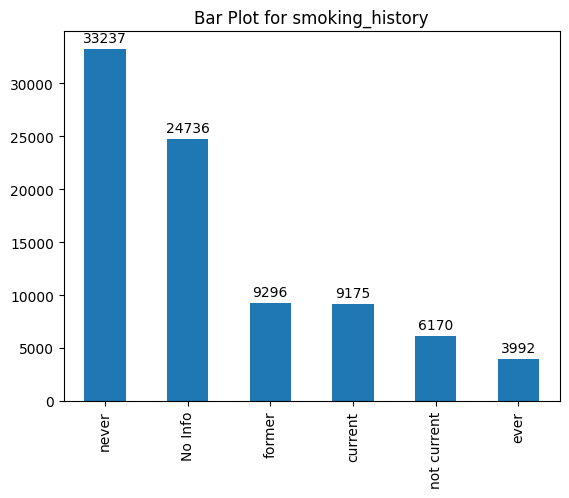

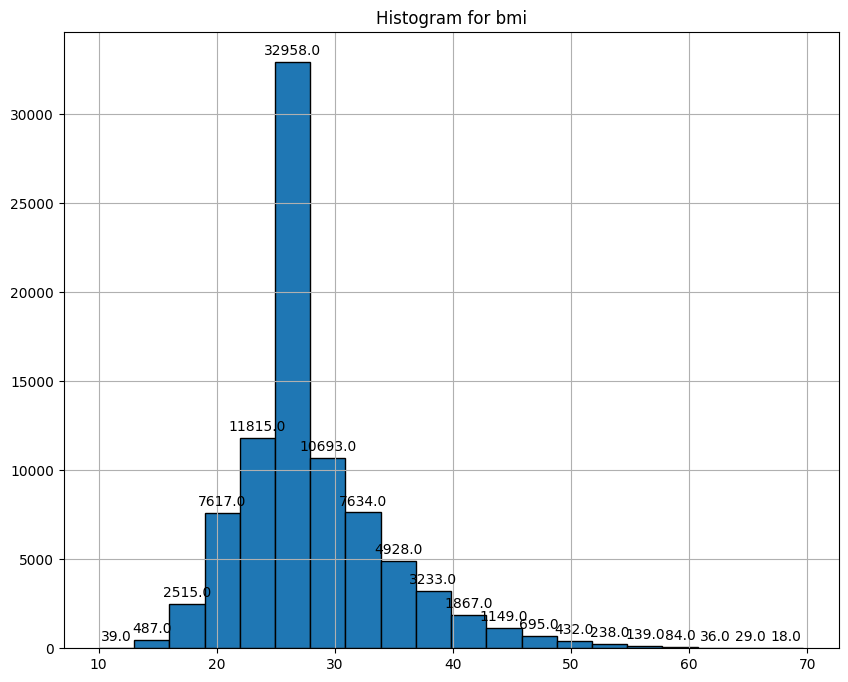

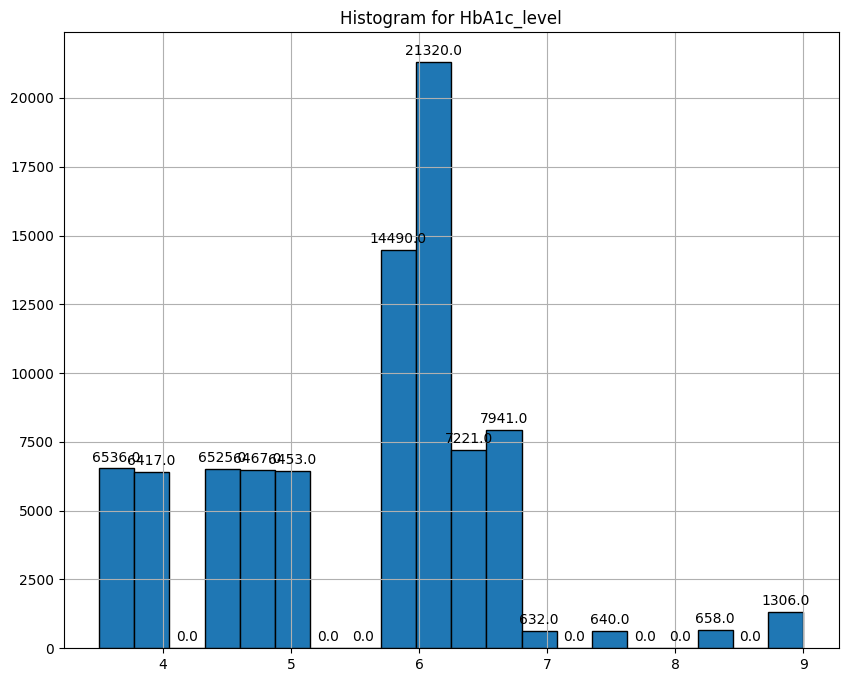

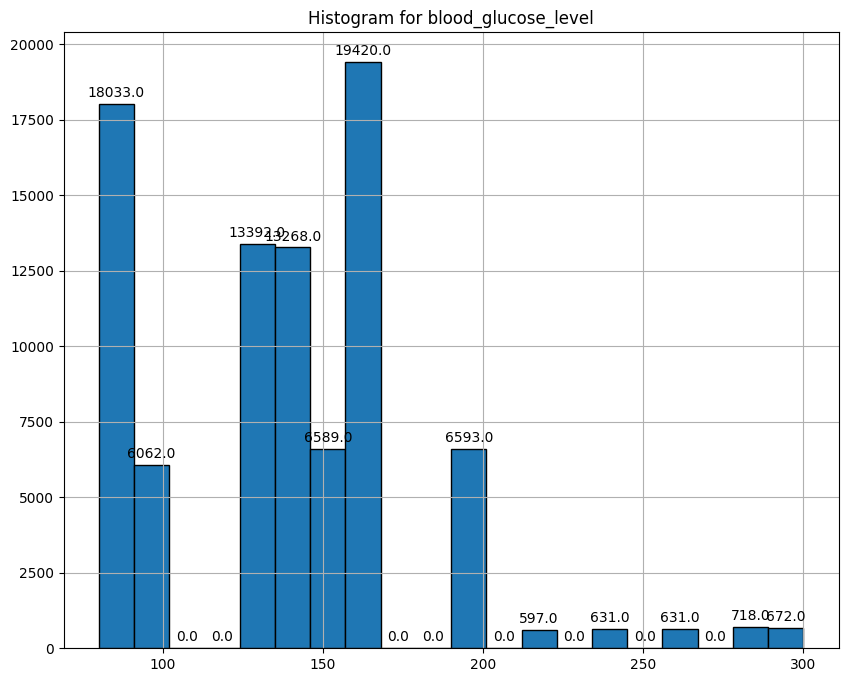

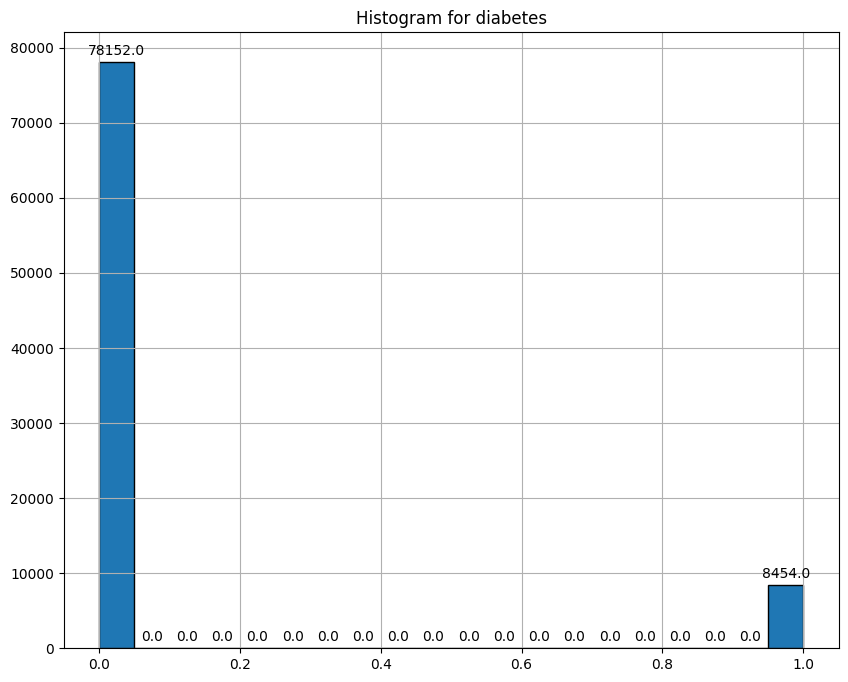

In [ ]:
vis(DF=df)

In [ ]:
# Create a donut chart to visualize the frequency of outcomes in the dataset
import plotly.express as px
outcome_freq = df['diabetes'].value_counts()
outcome_freq.index = ['Good', 'Diabetes']  # replace 0 and 1 with text labels
colors = ['#488A99', '#DADADA']
fig = px.pie(outcome_freq, values=outcome_freq.values, names=outcome_freq.index,
             hole=0.7, color=outcome_freq.index, color_discrete_sequence=colors)
fig.update_layout(title='Most people are not affected by diabetes.',
                  plot_bgcolor='#FFFFFF',
                  paper_bgcolor='#FFFFFF',
                  font_color='#333333',
                  title_font_size=24)
fig.update_traces(texttemplate='%{percent:.1%}', textposition='inside')
fig.show()

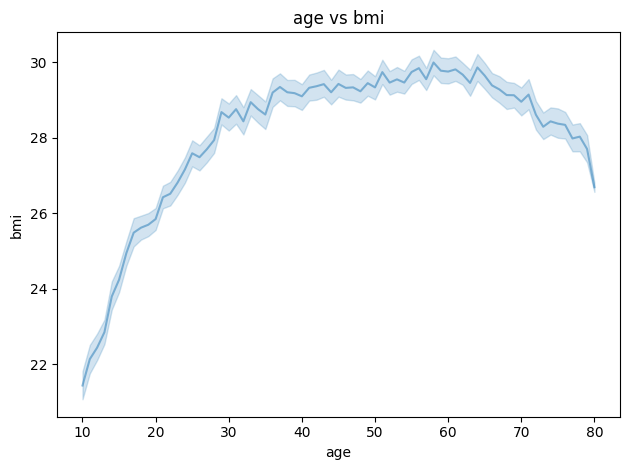

In [ ]:
sns.lineplot(x='age', y='bmi', data=df, alpha=0.5)
plt.title('age vs bmi')
plt.tight_layout()
plt.show()

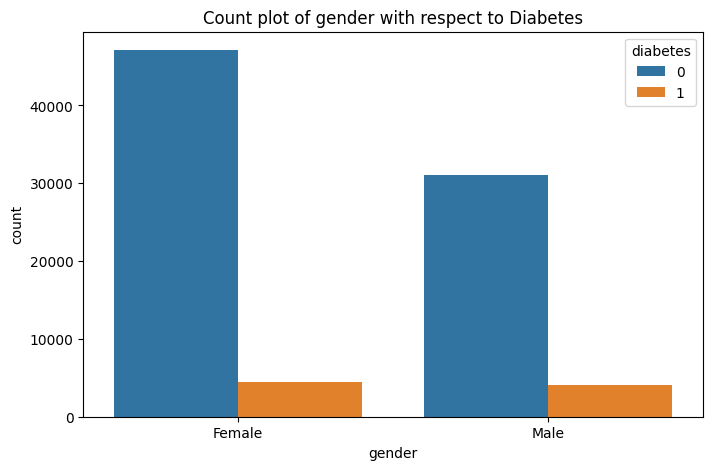

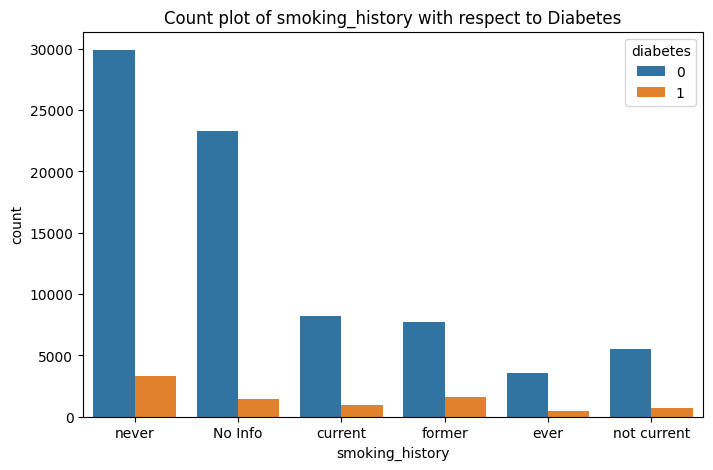

In [ ]:
# Countplot for categorical variables
categorical_columns = ['gender','smoking_history']
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='diabetes', data=df)
    plt.title(f'Count plot of {column} with respect to Diabetes')
    plt.show()

In [ ]:
# Sprawdzenie ilości badań z podziałem na płeć
gender_counts = df['gender'].value_counts()

# Sprawdzenie ilości osób chorych i zdrowych z podziałem na płeć
diabetes_by_gender = df.groupby(['gender', 'diabetes']).size().unstack(fill_value=0)

# Wyświetlenie wyników
print("Ilość badanych z podziałem na płeć:")
print(gender_counts)

print("\nIlość osób chorych (1) i zdrowych (0) z podziałem na płeć:")
print(diabetes_by_gender)


Ilość badanych z podziałem na płeć:
Female    51546
Male      35060
Name: gender, dtype: int64

Ilość osób chorych (1) i zdrowych (0) z podziałem na płeć:
diabetes      0     1
gender               
Female    47118  4428
Male      31034  4026


Można zauważyć, że w grupie badanej było ok. 60% kobiet i 40% mężczyzn.
Dodatkowo zarówno wśród kobiet, jak i mężczyzn, liczba osób chorych na diabetes jest niższa niż liczba osób zdrowych.

In [ ]:
# Liczba kobiet i mężczyzn
total_females = gender_counts['Female']
total_males = gender_counts['Male']

# Liczba kobiet i mężczyzn z diabetes
females_with_diabetes = diabetes_by_gender.loc['Female', 1]
males_with_diabetes = diabetes_by_gender.loc['Male', 1]

# Obliczenia procentowe
percentage_females_with_diabetes = (females_with_diabetes / total_females) * 100
percentage_males_with_diabetes = (males_with_diabetes / total_males) * 100

# Wyświetlenie wyników
print(f"Procent kobiet z diabetes: {percentage_females_with_diabetes:.2f}%")
print(f"Procent mężczyzn z diabetes: {percentage_males_with_diabetes:.2f}%")


Procent kobiet z diabetes: 8.59%
Procent mężczyzn z diabetes: 11.48%


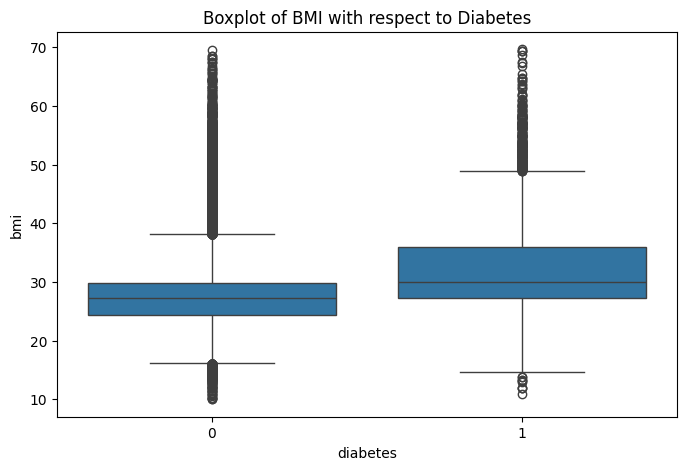

In [ ]:
# Boxplot for BMI
plt.figure(figsize=(8, 5))
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('Boxplot of BMI with respect to Diabetes')
plt.show()

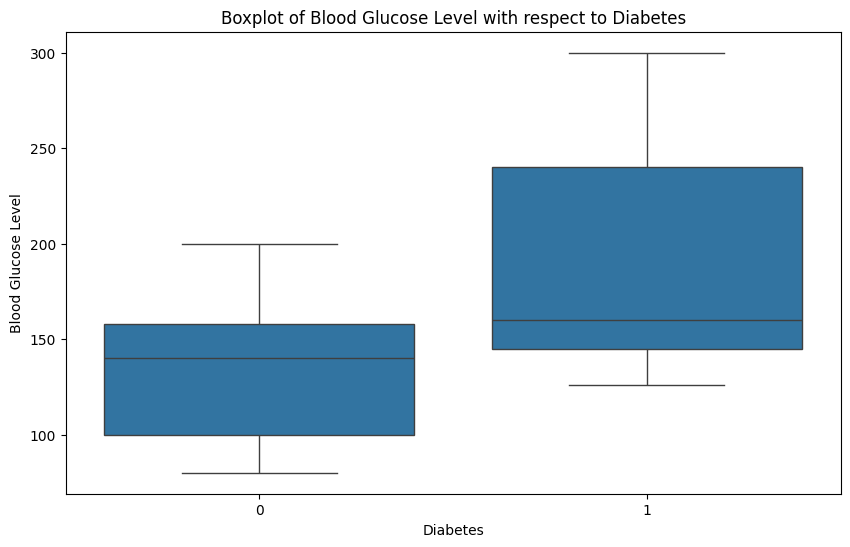

In [ ]:
# Boxplot for Blood Glucose Level with respect to Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Boxplot of Blood Glucose Level with respect to Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.show()

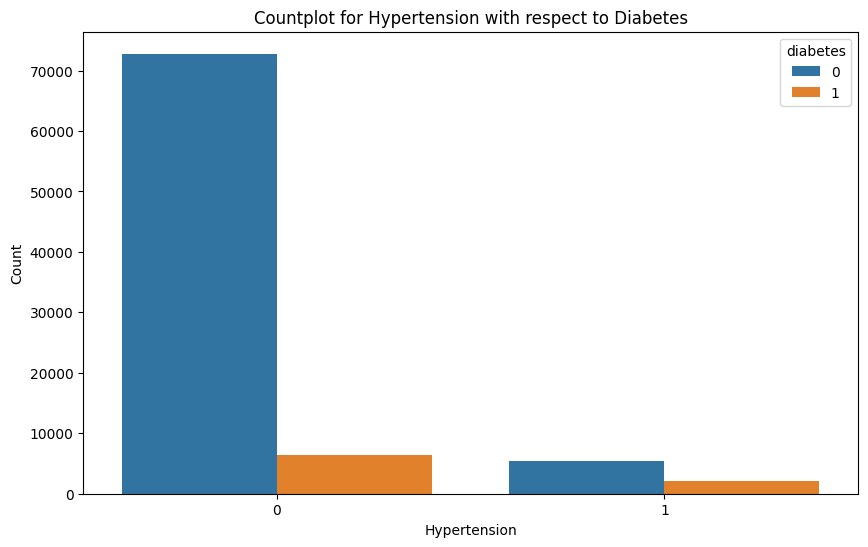

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', hue='diabetes', data=df)
plt.title('Countplot for Hypertension with respect to Diabetes')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

#Macierz korelacji danych

<ipython-input-255-bcc157e6dab5>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



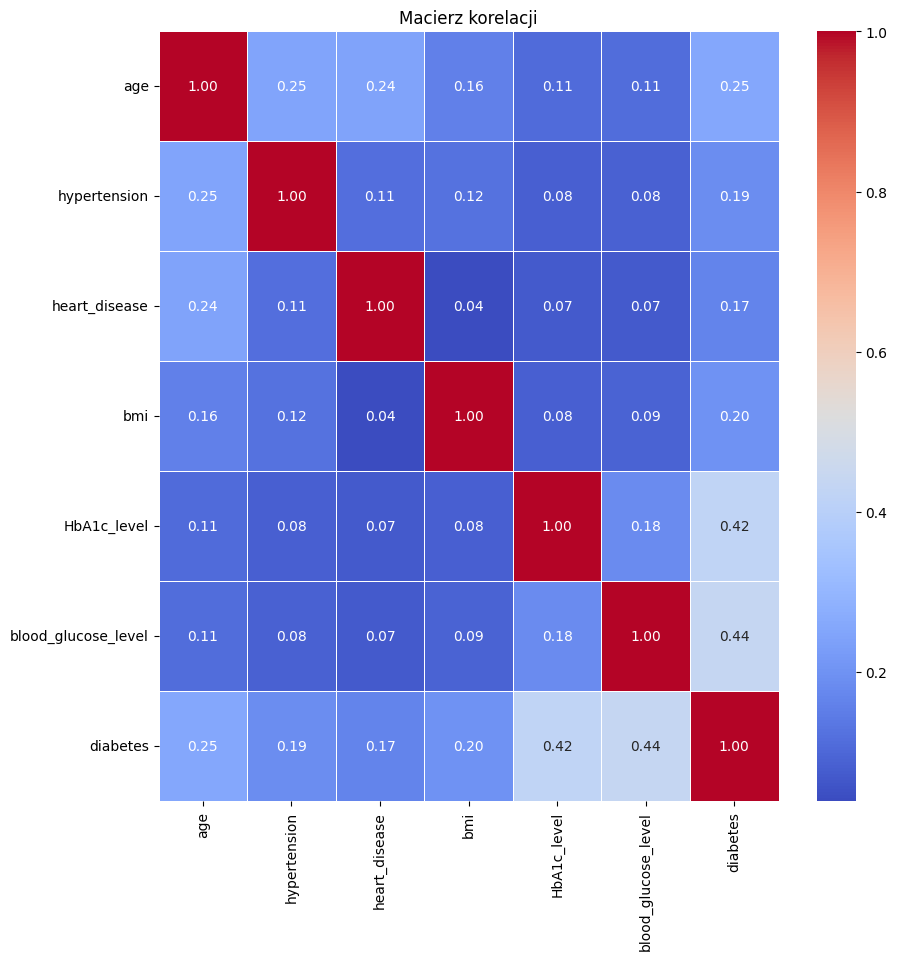

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Macierz korelacji')
plt.show()

#Data preporcesnig

In [ ]:
# Encode categorical variables using Label Encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
label_encoder = LabelEncoder()

In [ ]:
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

#Podział danych na set treningowy i testowy

In [ ]:
DF = df.select_dtypes(include='number')

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
y=DF['diabetes']
X = DF.iloc[:,:-1]

In [ ]:
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99993,0,40.0,0,0,4,40.69,3.5,155
99994,0,36.0,0,0,0,24.60,4.8,145
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_train.value_counts()

0    62488
1     6796
Name: diabetes, dtype: int64

In [ ]:
y_test.value_counts()

0    15664
1     1658
Name: diabetes, dtype: int64

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_train_pred = KNN.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_train_pred) # acc na treningowym
y_test_pred_knn = KNN.predict(X_test)
accuracy_knn =accuracy_score(y_test,y_test_pred_knn)

In [ ]:
accuracy_knn

0.9455605588269252

##Confusuion matrix dla KNN

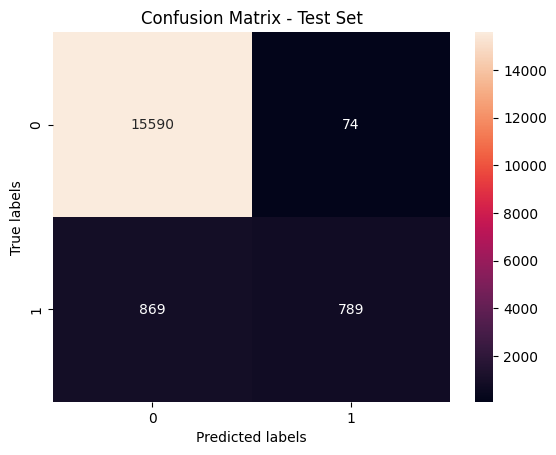

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_knn)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Test Set');

##Wykres zależności accuracy względem liczby sąsiadów (k)

In [ ]:
from sklearn.model_selection import cross_val_score
# liczba sąsiadów do testów
k_values = np.arange(1, 21, 1)

# Cross-validation
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

Najlepsza wartość k: 4


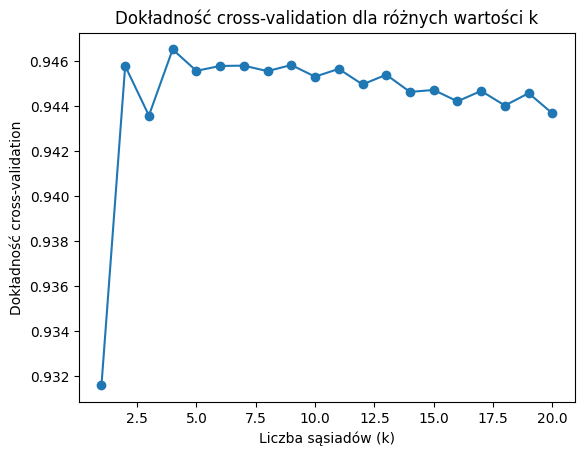

In [ ]:
best_k = k_values[np.argmax(cv_scores)]
print("Najlepsza wartość k:", best_k)
# wizualizacja
plt.plot(k_values, cv_scores, marker='o')
plt.title('Dokładność cross-validation dla różnych wartości k')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Dokładność cross-validation')
plt.show()

#SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
y_test_pred_svm = svc.predict(X_test)

accuracy_svm = accuracy_score(y_test,y_test_pred_svm)

In [ ]:
accuracy_svm

0.9399030135088327

##Confusion matrix dla SVM

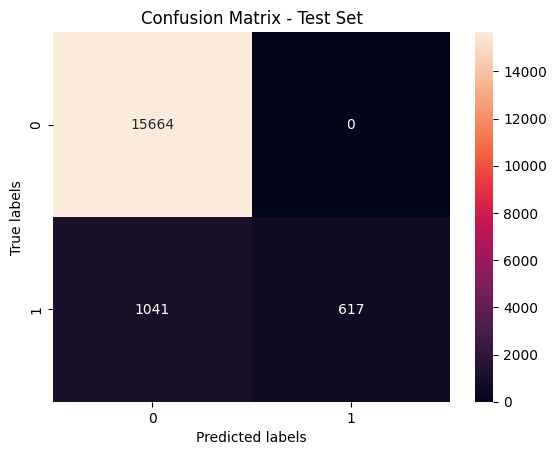

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_svm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Test Set');

#DRZEWO DECYZYJNE

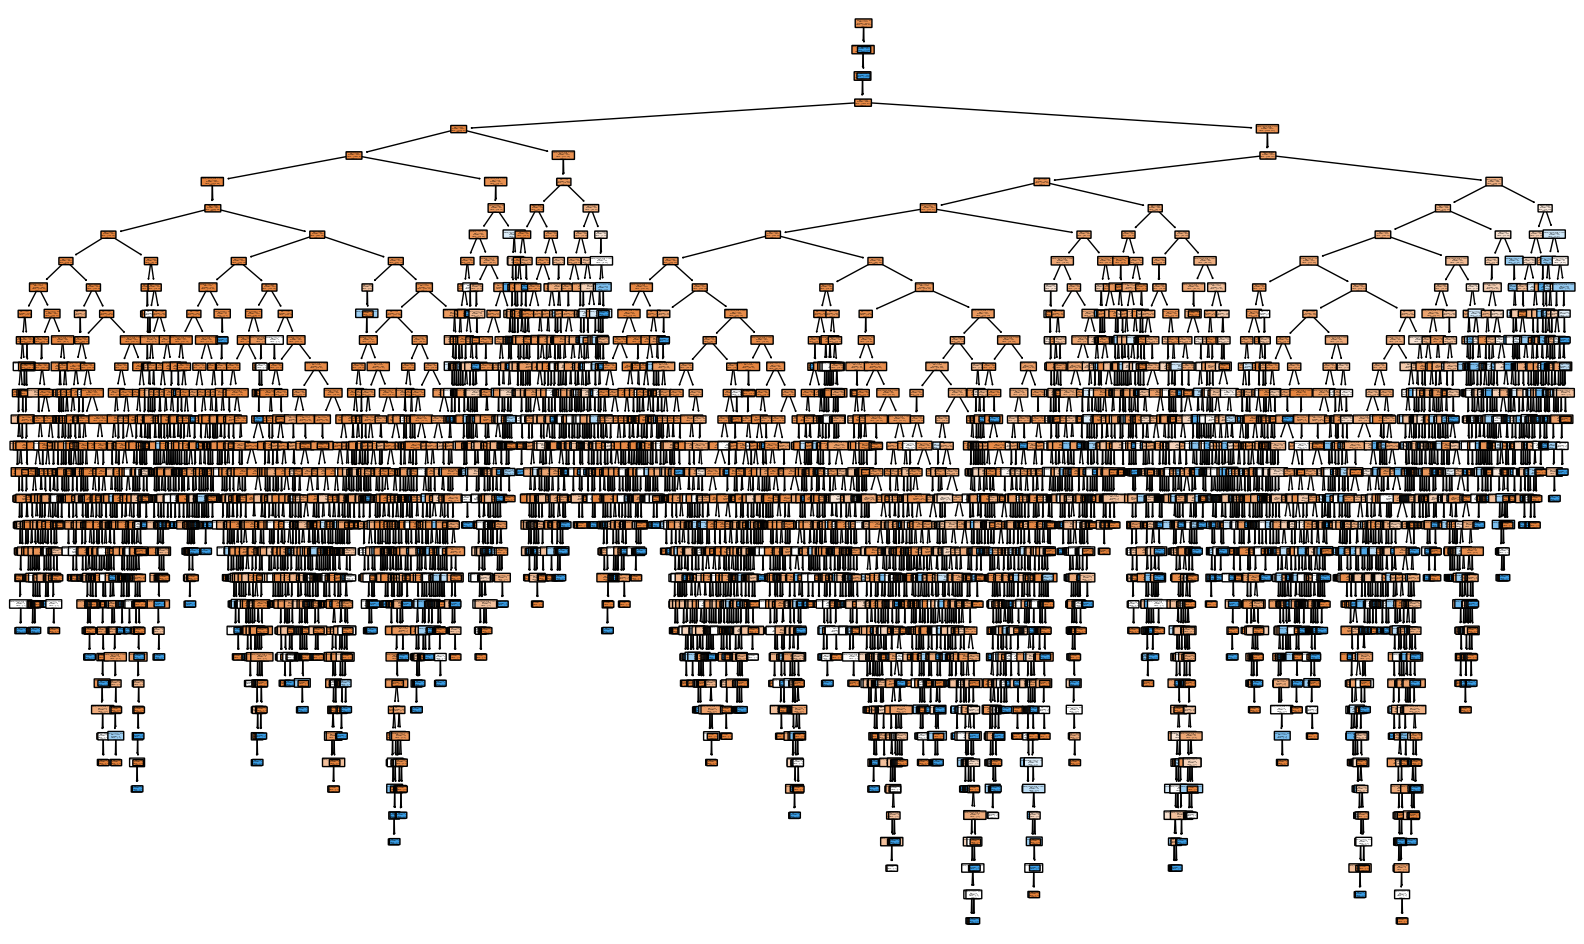

Reguły decyzyjne:
|--- HbA1c_level <= 6.70
|   |--- blood_glucose_level <= 210.00
|   |   |--- HbA1c_level <= 5.35
|   |   |   |--- class: 0
|   |   |--- HbA1c_level >  5.35
|   |   |   |--- age <= 53.50
|   |   |   |   |--- bmi <= 39.20
|   |   |   |   |   |--- hypertension <= 0.50
|   |   |   |   |   |   |--- blood_glucose_level <= 113.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- blood_glucose_level >  113.00
|   |   |   |   |   |   |   |--- age <= 38.50
|   |   |   |   |   |   |   |   |--- bmi <= 32.16
|   |   |   |   |   |   |   |   |   |--- age <= 25.50
|   |   |   |   |   |   |   |   |   |   |--- smoking_history <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- smoking_history >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |--- age >  25.50
|   |   |   |   |   |   |   |   |   |   |--- bmi <= 14.11


In [ ]:
# Importowanie niezbędnych bibliotek
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

# Iinicjalizacja i trening
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# drzewo decyzyjne
fig, ax = plt.subplots(figsize=(20, 12))
tree.plot_tree(clf, feature_names=X.columns, class_names = str(df['diabetes'].unique()), filled=True, rounded=True)
plt.show()

# reguły decyzyjne
r = export_text(clf, feature_names=X.columns.tolist())
print("Reguły decyzyjne:")
print(r)

In [ ]:
y_test_pred_dt = clf.predict(X_test)
accuracy_dt =accuracy_score(y_test,y_test_pred_dt)

In [ ]:
accuracy_dt

0.9430781664934765

#Confusion matrix DT

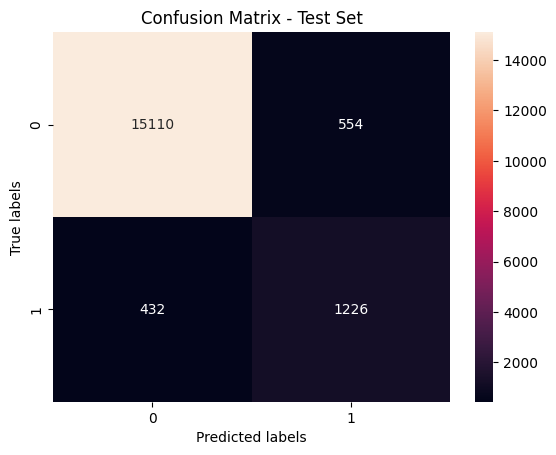

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_dt)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Test Set');

In [ ]:
#wyhaczyła więcej kosztem precyzji

#Random Forest (Bagging)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_f = RandomForestClassifier(random_state=42)

In [ ]:
random_f.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_test_pred_random_f = random_f.predict(X_test)

accuracy_random_f = accuracy_score(y_test,y_test_pred_random_f)

In [ ]:
accuracy_random_f

0.9651310472231844

##Confusion matrix dla Random Forest

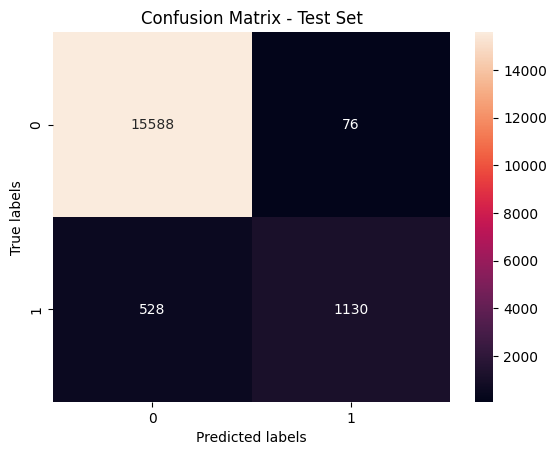

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_random_f)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Test Set');

#Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=42)

In [ ]:
GB.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_test_pred_GB = GB.predict(X_test)

accuracy_GB = accuracy_score(y_test,y_test_pred_GB)

In [ ]:
accuracy_GB

0.9678443597736982

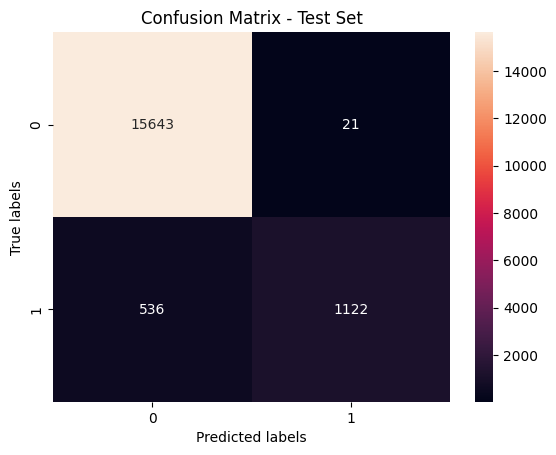

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_GB)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Test Set');

#Podsumowanie

In [ ]:
print(f'Dokładność KNN: {accuracy_knn:.4f}')
print(f'Dokładność SVM: {accuracy_svm:.4f}')
print(f'Dokładność Decision Tree: {accuracy_dt:.4f}')
print(f'Dokładność Random Forest: {accuracy_random_f:.4f}')
print(f'Dokładność Gradient Boost: {accuracy_GB:.4f}')

# Porównanie raportów klasyfikacji
print('\nRaport klasyfikacji dla KNN:')
print(classification_report(y_test, y_test_pred_knn))

print('\nRaport klasyfikacji dla SVC:')
print(classification_report(y_test, y_test_pred_svm))

print('\nRaport klasyfikacji dla Decision Tree:')
print(classification_report(y_test, y_test_pred_dt))

print('\nRaport klasyfikacji dla Random Forest:')
print(classification_report(y_test, y_test_pred_random_f))

print('\nRaport klasyfikacji dla GB:')
print(classification_report(y_test, y_test_pred_GB))

Dokładność KNN: 0.9456
Dokładność SVM: 0.9399
Dokładność Decision Tree: 0.9431
Dokładność Random Forest: 0.9651
Dokładność Gradient Boost: 0.9678

Raport klasyfikacji dla KNN:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     15664
           1       0.91      0.48      0.63      1658

    accuracy                           0.95     17322
   macro avg       0.93      0.74      0.80     17322
weighted avg       0.94      0.95      0.94     17322


Raport klasyfikacji dla SVC:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15664
           1       1.00      0.37      0.54      1658

    accuracy                           0.94     17322
   macro avg       0.97      0.69      0.76     17322
weighted avg       0.94      0.94      0.93     17322


Raport klasyfikacji dla Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97  

Dokładność (Accuracy):

To ogólna skuteczność modelu, czyli stosunek poprawnie sklasyfikowanych przypadków do ogólnej liczby przypadków.
W przypadku Random Forest uzyskano najwyższą dokładność, co sugeruje, że model ten najlepiej radzi sobie z przewidywaniem klas.
Precyzja (Precision):

Precyzja to stosunek poprawnie sklasyfikowanych pozytywnych przypadków (1) do sumy poprawnie sklasyfikowanych pozytywnych i fałszywie sklasyfikowanych pozytywnych przypadków.
W przypadku Random Forest uzyskano wysoką precyzję dla obu klas, co oznacza, że modele te mają tendencję do unikania fałszywie pozytywnych klasyfikacji.
Czułość (Recall, Sensitivity):

Czułość to stosunek poprawnie sklasyfikowanych pozytywnych przypadków do sumy poprawnie sklasyfikowanych pozytywnych i fałszywie sklasyfikowanych negatywnych przypadków.
Random Forest ma wysoką czułość dla klasy 0, co oznacza, że dobrze radzi sobie z identyfikacją prawdziwie negatywnych przypadków.
F1-Score:

F1-Score to harmoniczna średnia precyzji i czułości. Jest miarą, która równoważy zarówno precyzję, jak i czułość.
Random Forest uzyskał najwyższy F1-Score, co wskazuje na dobrą równowagę między precyzją a czułością.

**Random Forest (RF)**:

Typ algorytmu: Algorytm zespołowy (ensemble), oparty na drzewach decyzyjnych.
Zasada działania: Tworzy wiele drzew decyzyjnych (las) i łączy ich wyniki, aby uzyskać bardziej stabilną i dokładną prognozę.
Zastosowanie:
Klasyfikacja i regresja.
Odporny na przeuczenie (overfitting) dzięki zastosowaniu losowych podzbiorów danych treningowych i losowego wybierania cech podczas budowy drzewa.

**k-Nearest Neighbors (KNN)**:

Typ algorytmu: Algorytm oparty na instancjach (instance-based).
Zasada działania: Dokonuje prognozy na podstawie etykiet k najbliższych sąsiadów w przestrzeni cech.
Zastosowanie:
Klasyfikacja i regresja.
Opiera się na pomysłowości "podobieństwa" między przykładami.

**Support Vector Classifier (SVC)**:

Typ algorytmu: Algorytm oparty na maszynie wektorów nośnych (Support Vector Machine, SVM).
Zasada działania: Dąży do znalezienia hiperpłaszczyzny, która jak najlepiej separuje dane dla różnych klas.
Zastosowanie:
Klasyfikacja.
Efektywny w przestrzeniach o wysokich wymiarach, zwłaszcza gdy dane są liniowo separowalne.

**Decision Tree (DT)**:

Typ algorytmu: Algorytm drzewa decyzyjnego.
Zasada działania: Dąży do podziału przestrzeni cech na podstawie warunków decyzyjnych, tworząc drzewo z węzłami decyzyjnymi i liśćmi.
Zastosowanie:
Klasyfikacja i regresja.
Może być podatny na przeuczenie, zwłaszcza dla głębokich drzew.

 **Overfitting**

we have a perfect/close to perfect training set score while a poor test/validation score.

**underfitting**
In such cases, we see a low score on both the training set and test/validation set.

**Reasons behind overfitting:**
Using a complex model for a simple problem which picks up the noise from the data. Example: Fitting a neural network to the Iris dataset.
Small datasets, as the training set may not be a right representation of the universe.

**Reasons behind underfitting:**
Using a simple model for a complex problem which doesn’t learn all the patterns in the data. Example: Using a logistic regression for image classification
The underlying data has no inherent pattern. Example, trying to predict a student’s marks with his father’s weight.